In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch
# from GEH_LOSS import GEH_loss
import geh as ga

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5_multi.npz")['x'] 
Output_train_5 = np.load("Deep_train_5_multi.npz")['y']

Deep_test_5   = np.load("Deep_test_5_multi.npz")['x'] 
Output_test_5 = np.load("Deep_test_5_multi.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15_multi.npz")['x'] 
Output_train_15 = np.load("Deep_train_15_multi.npz")['y']

Deep_test_15   = np.load("Deep_test_15_multi.npz")['x'] 
Output_test_15 = np.load("Deep_test_15_multi.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30_multi.npz")['x'] 
Output_train_30 = np.load("Deep_train_30_multi.npz")['y']

Deep_test_30   = np.load("Deep_test_30_multi.npz")['x'] 
Output_test_30 = np.load("Deep_test_30_multi.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60_multi.npz")['x'] 
Output_train_60 = np.load("Deep_train_60_multi.npz")['y']

Deep_test_60   = np.load("Deep_test_60_multi.npz")['x'] 
Output_test_60 = np.load("Deep_test_60_multi.npz")['y']

In [6]:
# Wide Data
Xtrain = joblib.load("002weeks_train_Multi.save") 
Xtest = joblib.load("002weeks_test_Multi.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

C:\Users\esugom\.conda\envs\my_env\lib\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
Test      = pd.read_csv('01test_scaled.csv', index_col=None, parse_dates=[0])

In [128]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
plt.rc('font', size=22)

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [14]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 7                # No of loop detectors
n_seq = 3                     # Subsequences
n_steps = 5                   # time-step per subsequence
# val_percent = 0.07567       # 2 weeks
val_percent = 0.2        
batch_size = 32

n_seq_ = 3                     # Subsequences
n_steps_ = 3                   # time-step per subsequence

#### 5 mins

In [15]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = scaler.inverse_transform(Output_train_5)

In [16]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = scaler.inverse_transform(Output_test_5)

#### 15 mins

In [17]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = scaler.inverse_transform(Output_train_15)

In [18]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = scaler.inverse_transform(Output_test_15)

#### 30 mins

In [19]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = scaler.inverse_transform(Output_train_30)

In [20]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = scaler.inverse_transform(Output_test_30)

#### 60 mins

In [21]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = scaler.inverse_transform(Output_train_60)

In [22]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = scaler.inverse_transform(Output_test_60)

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [23]:
# define no_of_channels
n_channels = 1

In [24]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [25]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

In [26]:
# Train data
Wt5  =  Wt5.reshape(Wt5.shape[0], n_seq_, n_steps_, n_features)
Wt15 =  Wt15.reshape(Wt15.shape[0], n_seq_, n_steps_, n_features)
Wt30 =  Wt30.reshape(Wt30.shape[0], n_seq_, n_steps_, n_features)
Wt60 =  Wt60.reshape(Wt60.shape[0], n_seq_, n_steps_, n_features)

# Validation data
Wv5  =  Wv5.reshape(Wv5.shape[0], n_seq_, n_steps_, n_features)
Wv15 =  Wv15.reshape(Wv15.shape[0], n_seq_, n_steps_, n_features)
Wv30 =  Wv30.reshape(Wv30.shape[0], n_seq_, n_steps_, n_features)
Wv60 =  Wv60.reshape(Wv60.shape[0], n_seq_, n_steps_, n_features)

In [27]:
Xt5.shape

(31089, 3, 5, 7, 1)

In [28]:
Wt5.shape

(31089, 3, 3, 7)

# CNN-LSTM model

In [29]:
from tensorflow import keras
from keras_self_attention import SeqSelfAttention

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights = True)

In [30]:
Wide_train_5.shape

(31089, 9, 7)

# 5 mins ahead

In [31]:
def build_model_5(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt5.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt5.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_5w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_5 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_5w)
    
    
    # Deep Model
    # CNN 
    CNN_5 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_5 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_5)
    # LSTM          
    LSTM_5 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_5)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_5, LSTM_5], axis=1)

    # Attention
    Att_5 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_5)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_5 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_5.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss="mse", metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                                   
    return model_5

In [32]:
tuner5 = RandomSearch(
    build_model_5,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8a-5",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\8a-5\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\8a-5\tuner0.json


In [33]:
tuner5.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [34]:
tuner5.search((Wt5,Xt5), yt5, epochs=200,
           validation_split = val_percent,
           callbacks = [early_stop],
           verbose=2)

In [ ]:
tuner5.results_summary(1)

### Best Model

In [33]:
scaler_filename = "Best_HP/8a-5"
best_hp5 = joblib.load(scaler_filename) 

model5 = tuner5.hypermodel.build(best_hp5)

In [ ]:
best_hp5 = tuner5.get_best_hyperparameters()[0]
model5 = tuner5.hypermodel.build(best_hp5)

In [ ]:
scaler_filename = "Best_HP/8a-5"
joblib.dump(best_hp5, scaler_filename) 

In [ ]:
model5.summary()

In [35]:
model5.fit((Wt5,Xt5), yt5, validation_split = val_percent,
           epochs = 100, 
           verbose = 1)

Epoch 1/100
778/778 [==============================] - 22s 15ms/step - loss: 26429.0098 - mean_absolute_error: 125.3549 - root_mean_squared_error: 162.5700 - mean_absolute_percentage_error: 45293684.0000 - val_loss: 8384.4287 - val_mean_absolute_error: 66.1644 - val_root_mean_squared_error: 91.5665 - val_mean_absolute_percentage_error: 2199867.7500
Epoch 2/100
778/778 [==============================] - 10s 13ms/step - loss: 4319.7524 - mean_absolute_error: 44.0060 - root_mean_squared_error: 65.7248 - mean_absolute_percentage_error: 44579168.0000 - val_loss: 2011.7249 - val_mean_absolute_error: 30.4076 - val_root_mean_squared_error: 44.8523 - val_mean_absolute_percentage_error: 2273193.5000
Epoch 3/100
778/778 [==============================] - 11s 14ms/step - loss: 1475.3036 - mean_absolute_error: 26.1276 - root_mean_squared_error: 38.4097 - mean_absolute_percentage_error: 46194940.0000 - val_loss: 973.6551 - val_mean_absolute_error: 22.3882 - val_root_mean_squared_error: 31.2034 - val

Epoch 25/100
778/778 [==============================] - 11s 14ms/step - loss: 486.2729 - mean_absolute_error: 16.2860 - root_mean_squared_error: 22.0516 - mean_absolute_percentage_error: 19306920.0000 - val_loss: 505.9502 - val_mean_absolute_error: 16.9285 - val_root_mean_squared_error: 22.4933 - val_mean_absolute_percentage_error: 3494548.0000
Epoch 26/100
778/778 [==============================] - 11s 14ms/step - loss: 483.8058 - mean_absolute_error: 16.2468 - root_mean_squared_error: 21.9956 - mean_absolute_percentage_error: 18338312.0000 - val_loss: 507.9242 - val_mean_absolute_error: 16.9060 - val_root_mean_squared_error: 22.5372 - val_mean_absolute_percentage_error: 3507164.7500
Epoch 27/100
778/778 [==============================] - 11s 14ms/step - loss: 483.1603 - mean_absolute_error: 16.2440 - root_mean_squared_error: 21.9809 - mean_absolute_percentage_error: 18032504.0000 - val_loss: 509.9832 - val_mean_absolute_error: 17.0191 - val_root_mean_squared_error: 22.5828 - val_mean

Epoch 49/100
778/778 [==============================] - 11s 14ms/step - loss: 435.2237 - mean_absolute_error: 15.4735 - root_mean_squared_error: 20.8620 - mean_absolute_percentage_error: 10663143.0000 - val_loss: 498.1568 - val_mean_absolute_error: 16.7897 - val_root_mean_squared_error: 22.3194 - val_mean_absolute_percentage_error: 3751279.0000
Epoch 50/100
778/778 [==============================] - 11s 14ms/step - loss: 432.6908 - mean_absolute_error: 15.4260 - root_mean_squared_error: 20.8012 - mean_absolute_percentage_error: 9553540.0000 - val_loss: 489.0992 - val_mean_absolute_error: 16.5951 - val_root_mean_squared_error: 22.1156 - val_mean_absolute_percentage_error: 3542639.5000
Epoch 51/100
778/778 [==============================] - 11s 14ms/step - loss: 431.3777 - mean_absolute_error: 15.4344 - root_mean_squared_error: 20.7696 - mean_absolute_percentage_error: 9951698.0000 - val_loss: 494.6827 - val_mean_absolute_error: 16.7582 - val_root_mean_squared_error: 22.2415 - val_mean_a

Epoch 73/100
778/778 [==============================] - 11s 14ms/step - loss: 389.1643 - mean_absolute_error: 14.6964 - root_mean_squared_error: 19.7272 - mean_absolute_percentage_error: 8053872.5000 - val_loss: 504.7164 - val_mean_absolute_error: 16.8621 - val_root_mean_squared_error: 22.4659 - val_mean_absolute_percentage_error: 3296538.0000
Epoch 74/100
778/778 [==============================] - 11s 14ms/step - loss: 389.3601 - mean_absolute_error: 14.6943 - root_mean_squared_error: 19.7322 - mean_absolute_percentage_error: 7681478.5000 - val_loss: 498.0458 - val_mean_absolute_error: 16.7590 - val_root_mean_squared_error: 22.3169 - val_mean_absolute_percentage_error: 3384045.0000
Epoch 75/100
778/778 [==============================] - 10s 13ms/step - loss: 386.7417 - mean_absolute_error: 14.6495 - root_mean_squared_error: 19.6658 - mean_absolute_percentage_error: 7945591.0000 - val_loss: 502.8574 - val_mean_absolute_error: 16.8611 - val_root_mean_squared_error: 22.4245 - val_mean_ab

In [36]:
metrics5 = pd.DataFrame(model5.history.history)

In [37]:
# Copy the 'metrics5' DataFrame to avoid modifying the original data
normalized_metrics5 = metrics5.copy()

# Define the columns to be normalized
columns_to_normalize = ['loss', 'val_loss']

# Perform min-max normalization on the selected columns
for column in columns_to_normalize:
    min_val = metrics5[column].min()
    max_val = metrics5[column].max()
    normalized_metrics5[column] = (metrics5[column] - min_val) / (max_val - min_val)

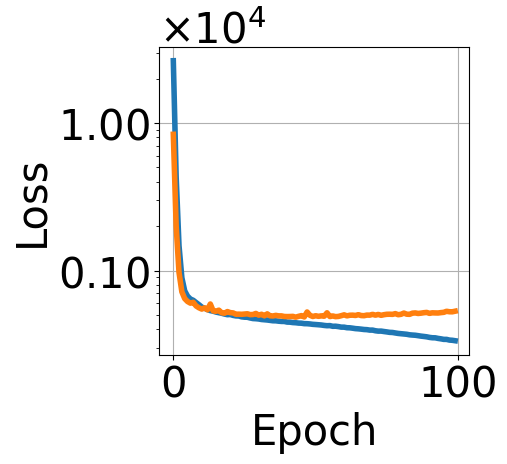

In [38]:
fig, axes = plt.subplots(figsize=(4,4))

# Add set of axes to figure
axes.set_yscale('log')
axes.plot(metrics5[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()

#mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
axes.yaxis.set_major_formatter(formatter)

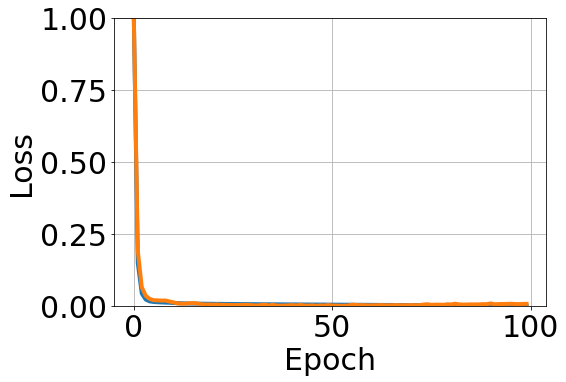

In [144]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes.plot(normalized_metrics5[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(0,1)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()

#mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
#axes.yaxis.set_major_formatter(formatter)

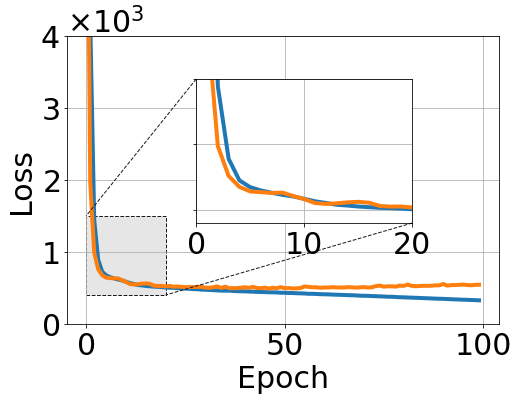

In [145]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.3, 0.35, 0.5, 0.5]) # Smaller figure
axes.plot(metrics5[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(0,4000)

axes2.plot(metrics5[['loss','val_loss']], lw=4)
axes2.set_xlim(0,20)
axes2.set_ylim(400,1500)
#plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
axes.yaxis.set_major_formatter(formatter)

In [ ]:
model5.save("my_dir/8a-5")

In [31]:
model5 = keras.models.load_model("my_dir/8a-5", custom_objects=SeqSelfAttention.get_custom_objects()) 

In [32]:
model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 7)]    0           []                               
                                                                                                  
 time_distributed_4 (TimeDistri  (None, 3, 4, 6, 160  800        ['DeepInput[0][0]']              
 buted)                         )                                                                 
                                                                                            

In [88]:
model5.layers[8].get_weights()

[array([[ 0.48384324, -0.3183184 , -0.8582073 , ...,  0.21832728,
          0.4985954 , -0.29431903],
        [-0.45137864,  0.00704534,  0.34079066, ...,  0.36728662,
         -0.43585166, -0.06479387],
        [ 0.28983667,  0.14556777,  0.4357353 , ...,  0.2913544 ,
          0.07947234, -0.45381728],
        ...,
        [ 0.00209678,  0.4634204 ,  0.30478254, ...,  0.19451495,
         -0.1126006 , -0.31367427],
        [ 0.42797792,  0.04627108,  0.03928623, ..., -0.00653986,
          0.2094275 , -0.06222307],
        [ 0.32913467,  0.1408738 ,  0.38203272, ..., -0.05297726,
         -0.16985872, -0.18253165]], dtype=float32),
 array([[ 0.3884461 ,  1.2442572 , -0.10281471, ...,  0.2919561 ,
         -0.0453087 , -0.41885912],
        [ 0.5928738 , -0.7634272 ,  0.0785111 , ..., -0.28476167,
          0.09262085, -0.15473448],
        [-0.08752039, -0.9888884 ,  0.3368069 , ..., -0.3075879 ,
          0.23024444, -0.35197234],
        ...,
        [-0.3727263 ,  0.7320034 ,  0.3

In [84]:
scaler_filename = "Best_HP/8a-5"
best_hp5 = joblib.load(scaler_filename) 

In [86]:
best_hp5.values

{'units': 57, 'filters': 160, 'kernel_size': 2, 'learning_rate': 0.001}

In [33]:
model5.layers[8].get_weights()[0].shape

(57, 32)

In [34]:
model5.layers[6].get_weights()[0].shape

(3840, 228)

In [35]:
model5.layers[5].get_weights()[0].shape

(21, 228)

In [70]:
model5.layers[8].get_custom_objects()

{'SeqSelfAttention': keras_self_attention.seq_self_attention.SeqSelfAttention}

In [65]:
att5_weights = model5.layers[8].get_weights()[0]

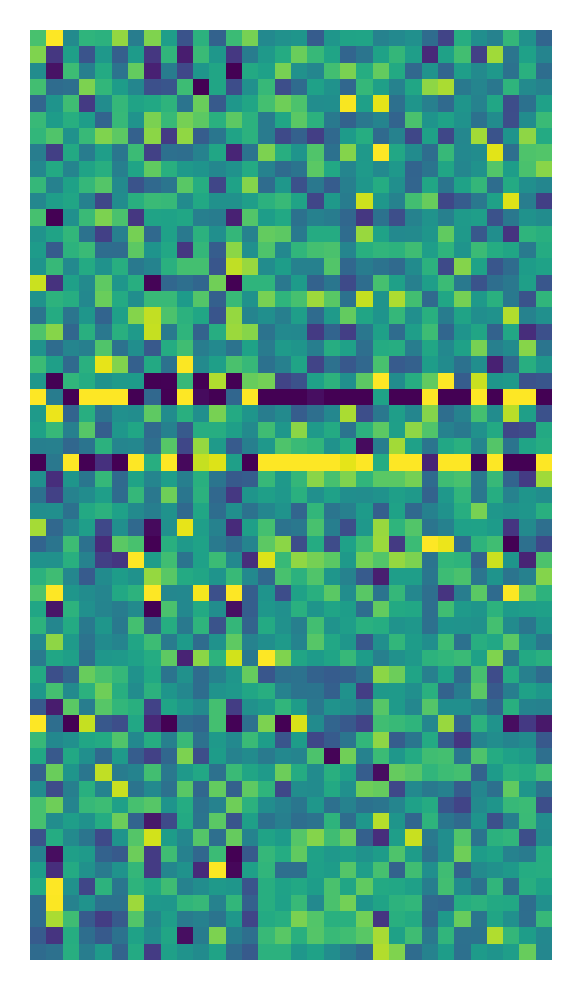

In [73]:
plt.figure(figsize=(12,4), dpi=300)

hmap = sns.heatmap(att5_weights,
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            #cbar_kws={'fraction' : 0.01}, # shrink colour bar
            cmap='viridis',
            robust=True,
            square=True,
            )

plt.tight_layout()
plt.show()

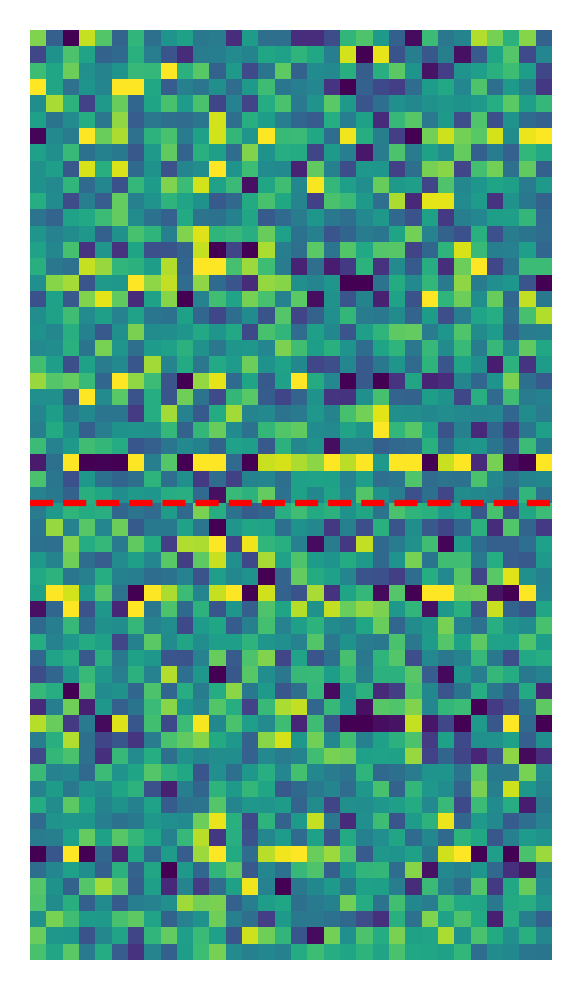

In [92]:
att5_weights = model5.layers[8].get_weights()[0]

plt.figure(figsize=(12,4), dpi=300)

hmap = sns.heatmap(att5_weights,
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            #cbar_kws={'fraction' : 0.01}, # shrink colour bar
            cmap='viridis',
            robust=True,
            square=True,
            )
plt.axhline(y=29, color='red', linestyle='--')


plt.tight_layout()
plt.show()

In [49]:
layers_indices = []
for index, layer in enumerate(model5.layers):
    layers_indices.append(index)
layers_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [32]:
model5.predict((Wv5,Xv5))

array([[ 67.75818 ,  70.07021 ,  75.87873 , ...,  72.460625,  51.128777,
         51.68292 ],
       [ 66.7092  ,  68.1204  ,  76.676674, ...,  71.10775 ,  50.777607,
         47.561333],
       [ 54.350674,  57.3212  ,  60.9636  , ...,  58.357155,  40.769306,
         42.222664],
       ...,
       [136.07123 , 142.76152 , 152.49614 , ..., 144.12526 ,  97.75095 ,
         79.61091 ],
       [122.81646 , 126.396614, 135.78204 , ..., 127.48603 ,  90.53893 ,
         80.34822 ],
       [129.65398 , 135.1509  , 144.26936 , ..., 144.32945 ,  93.88532 ,
         83.36093 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions5 = model5.predict((Wv5,Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5)

MAE5 = mean_absolute_error(yv5,test_predictions5)

RMSE5 = np.sqrt(MSE5)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

eval5 = [MSE5, MAE5, RMSE5, MAPE5]
print(eval5)

In [37]:
test_predictions5 = model5.predict((Wv5,Xv5))


MSE5 = mean_squared_error(yv5,test_predictions5,multioutput='raw_values')

MAE5 = mean_absolute_error(yv5,test_predictions5,multioutput='raw_values')

RMSE5 = mean_squared_error(yv5,test_predictions5,multioutput='raw_values',squared=False)

MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5,multioutput='raw_values')*100

# eval5 = [MSE5, MAE5, RMSE5, MAPE5]
# print(eval5)

In [38]:
MSE5

array([581.53845222, 721.91764844, 663.84021779, 356.5477708 ,
       581.69117957, 385.38595429, 278.99022469])

In [39]:
MAE5

array([18.69375404, 20.22319968, 19.95069079, 14.43920875, 18.1789424 ,
       14.91455547, 12.74645953])

In [40]:
RMSE5

array([24.11510838, 26.86852524, 25.76509689, 18.88247258, 24.11827481,
       19.63124943, 16.70300047])

In [41]:
MAPE5

array([9.8492457 , 9.87649408, 9.25110254, 7.22043914, 7.91523986,
       8.73054685, 8.20278564])

In [ ]:
GEH, count = ga.GEH(np.asarray(yv5), np.asarray(test_predictions5))
GEH5 = count/GEH.size
print(GEH5)

In [ ]:
err = yv5 - test_predictions5

In [ ]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(test_predictions5, err, 4)
axes.set_xlabel('Flow')
axes.set_ylabel('Error')
axes.set_title('Flow vs. Error')
axes.grid()

In [ ]:
sns.histplot(data=c, x=c[:,1], y=c[:,0], bins=20)

In [ ]:
sns.histplot(data=c, x=c[:,1], bins=20)

In [ ]:
a = err.flatten().reshape(-1, 1)
b = test_predictions5.flatten().reshape(-1, 1)
c = np.concatenate((a,b), axis=1)

# 15 mins ahead

In [39]:
def build_model_15(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt15.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt15.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_15w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_15 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_15w)
    
    
    
    # Deep Model
    # CNN 
    CNN_15 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_15 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_15)
    # LSTM          
    LSTM_15 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_15)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_15, LSTM_15], axis=1)

    # Attention
    Att_15 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_15)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_15 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_15.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss="mse", metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_15

In [40]:
tuner15 = RandomSearch(
    build_model_15,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8a-15",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\8a-15\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\8a-15\tuner0.json


In [ ]:
tuner15.search_space_summary()

In [ ]:
tuner15.search((Wt15,Xt15), yt15, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop], 
            verbose=2)

In [ ]:
tuner15.results_summary(1)

### Best model

In [41]:
scaler_filename = "Best_HP/8a-15"
best_hp15 = joblib.load(scaler_filename) 

model15 = tuner15.hypermodel.build(best_hp15)

In [ ]:
best_hp15 = tuner15.get_best_hyperparameters()[0]
model15 = tuner15.hypermodel.build(best_hp15)

In [ ]:
scaler_filename = "Best_HP/8a-15"
joblib.dump(best_hp15, scaler_filename) 

In [42]:
model15.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 DeepInput (InputLayer)         [(None, 3, 5, 7, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 WideInput (InputLayer)         [(None, 3, 3, 7)]    0           []                               
                                                                                                  
 time_distributed_10 (TimeDistr  (None, 3, 4, 6, 320  1600       ['DeepInput[0][0]']              
 ibuted)                        )                                                                 
                                                                                            

In [43]:
model15.fit((Wt15,Xt15), yt15, validation_split = val_percent,
            epochs = 100, 
            verbose = 1)

Epoch 1/100
778/778 [==============================] - 19s 18ms/step - loss: 25492.4102 - mean_absolute_error: 122.5349 - root_mean_squared_error: 159.6634 - mean_absolute_percentage_error: 43832940.0000 - val_loss: 7650.6680 - val_mean_absolute_error: 63.1869 - val_root_mean_squared_error: 87.4681 - val_mean_absolute_percentage_error: 2166431.5000
Epoch 2/100
778/778 [==============================] - 12s 15ms/step - loss: 3925.2004 - mean_absolute_error: 42.0844 - root_mean_squared_error: 62.6514 - mean_absolute_percentage_error: 44540888.0000 - val_loss: 1903.3727 - val_mean_absolute_error: 30.1185 - val_root_mean_squared_error: 43.6277 - val_mean_absolute_percentage_error: 2388920.2500
Epoch 3/100
778/778 [==============================] - 12s 15ms/step - loss: 1442.3690 - mean_absolute_error: 26.2606 - root_mean_squared_error: 37.9785 - mean_absolute_percentage_error: 46257360.0000 - val_loss: 1093.2871 - val_mean_absolute_error: 24.4215 - val_root_mean_squared_error: 33.0649 - va

Epoch 25/100
778/778 [==============================] - 12s 16ms/step - loss: 570.3112 - mean_absolute_error: 17.5298 - root_mean_squared_error: 23.8812 - mean_absolute_percentage_error: 19448586.0000 - val_loss: 641.3344 - val_mean_absolute_error: 18.8174 - val_root_mean_squared_error: 25.3246 - val_mean_absolute_percentage_error: 3765626.7500
Epoch 26/100
778/778 [==============================] - 12s 15ms/step - loss: 565.5137 - mean_absolute_error: 17.4586 - root_mean_squared_error: 23.7805 - mean_absolute_percentage_error: 17565758.0000 - val_loss: 632.9275 - val_mean_absolute_error: 18.6832 - val_root_mean_squared_error: 25.1581 - val_mean_absolute_percentage_error: 3674834.2500
Epoch 27/100
778/778 [==============================] - 12s 16ms/step - loss: 560.1010 - mean_absolute_error: 17.3822 - root_mean_squared_error: 23.6665 - mean_absolute_percentage_error: 16838576.0000 - val_loss: 628.0018 - val_mean_absolute_error: 18.6643 - val_root_mean_squared_error: 25.0600 - val_mean

Epoch 49/100
778/778 [==============================] - 12s 15ms/step - loss: 499.5623 - mean_absolute_error: 16.4835 - root_mean_squared_error: 22.3509 - mean_absolute_percentage_error: 10451490.0000 - val_loss: 623.5433 - val_mean_absolute_error: 18.5978 - val_root_mean_squared_error: 24.9708 - val_mean_absolute_percentage_error: 3819650.5000
Epoch 50/100
778/778 [==============================] - 11s 14ms/step - loss: 496.5422 - mean_absolute_error: 16.4301 - root_mean_squared_error: 22.2832 - mean_absolute_percentage_error: 10950340.0000 - val_loss: 621.4639 - val_mean_absolute_error: 18.5912 - val_root_mean_squared_error: 24.9292 - val_mean_absolute_percentage_error: 3558565.0000
Epoch 51/100
778/778 [==============================] - 11s 15ms/step - loss: 495.2963 - mean_absolute_error: 16.4176 - root_mean_squared_error: 22.2552 - mean_absolute_percentage_error: 10204069.0000 - val_loss: 627.7122 - val_mean_absolute_error: 18.6807 - val_root_mean_squared_error: 25.0542 - val_mean

Epoch 73/100
778/778 [==============================] - 11s 15ms/step - loss: 439.4274 - mean_absolute_error: 15.4779 - root_mean_squared_error: 20.9625 - mean_absolute_percentage_error: 9764264.0000 - val_loss: 651.9435 - val_mean_absolute_error: 19.0682 - val_root_mean_squared_error: 25.5332 - val_mean_absolute_percentage_error: 3768644.0000
Epoch 74/100
778/778 [==============================] - 11s 14ms/step - loss: 437.6882 - mean_absolute_error: 15.4624 - root_mean_squared_error: 20.9210 - mean_absolute_percentage_error: 9729100.0000 - val_loss: 658.3154 - val_mean_absolute_error: 19.1702 - val_root_mean_squared_error: 25.6577 - val_mean_absolute_percentage_error: 3786155.2500
Epoch 75/100
778/778 [==============================] - 11s 14ms/step - loss: 437.8334 - mean_absolute_error: 15.4595 - root_mean_squared_error: 20.9245 - mean_absolute_percentage_error: 9140093.0000 - val_loss: 647.4419 - val_mean_absolute_error: 18.9964 - val_root_mean_squared_error: 25.4449 - val_mean_ab

Epoch 97/100
778/778 [==============================] - 12s 15ms/step - loss: 382.3268 - mean_absolute_error: 14.4687 - root_mean_squared_error: 19.5532 - mean_absolute_percentage_error: 9822930.0000 - val_loss: 672.8907 - val_mean_absolute_error: 19.3712 - val_root_mean_squared_error: 25.9401 - val_mean_absolute_percentage_error: 3828658.5000
Epoch 98/100
778/778 [==============================] - 11s 15ms/step - loss: 379.0145 - mean_absolute_error: 14.3984 - root_mean_squared_error: 19.4683 - mean_absolute_percentage_error: 9435631.0000 - val_loss: 679.5096 - val_mean_absolute_error: 19.5011 - val_root_mean_squared_error: 26.0674 - val_mean_absolute_percentage_error: 4054873.2500
Epoch 99/100
778/778 [==============================] - 12s 16ms/step - loss: 377.6629 - mean_absolute_error: 14.3857 - root_mean_squared_error: 19.4336 - mean_absolute_percentage_error: 9765903.0000 - val_loss: 685.8148 - val_mean_absolute_error: 19.6096 - val_root_mean_squared_error: 26.1881 - val_mean_ab

In [44]:
metrics15 = pd.DataFrame(model15.history.history)

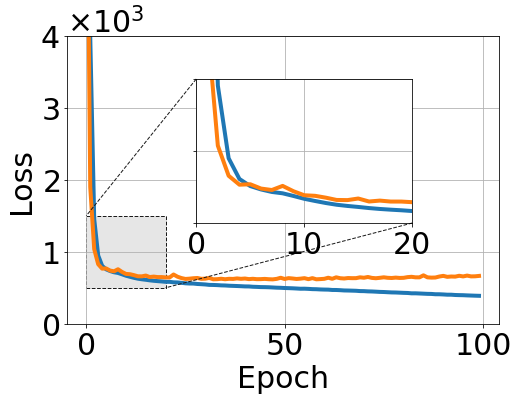

In [147]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.3, 0.35, 0.5, 0.5]) # Smaller figure
axes.plot(metrics15[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(0,4000)

axes2.plot(metrics15[['loss','val_loss']], lw=4)
axes2.set_xlim(0,20)
axes2.set_ylim(500,1500)
#plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
axes.yaxis.set_major_formatter(formatter)

In [ ]:
model15.save("my_dir/8a-15")

In [38]:
model15 = keras.models.load_model("my_dir/8a-15", custom_objects=SeqSelfAttention.get_custom_objects())

In [41]:
scaler_filename = "Best_HP/8a-15"
best_hp15 = joblib.load(scaler_filename)

In [44]:
best_hp15.values

{'units': 59, 'filters': 320, 'kernel_size': 2, 'learning_rate': 0.001}

In [42]:
model15.layers[8].get_weights()[0].shape

(59, 32)

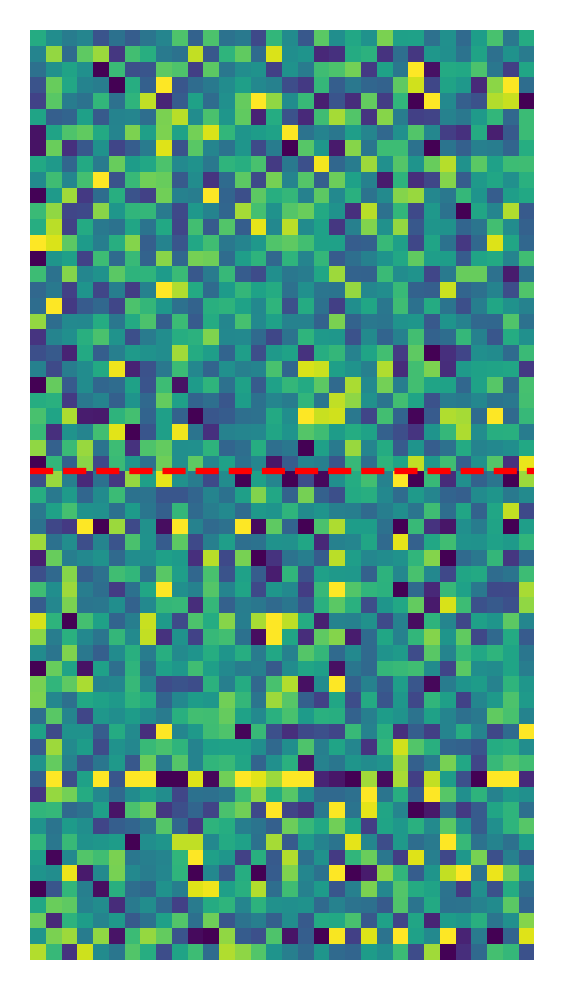

In [83]:
att15_weights = model15.layers[8].get_weights()[0]

plt.figure(figsize=(12,4), dpi=300)

hmap = sns.heatmap(att15_weights,
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            #cbar_kws={'fraction' : 0.01}, # shrink colour bar
            cmap='viridis',
            robust=True,
            square=True,
            )
plt.axhline(y=30, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [43]:
model15.predict((Wv15,Xv15))

array([[ 61.233547,  65.03271 ,  70.812195, ...,  69.483505,  44.72527 ,
         47.613136],
       [ 58.50959 ,  61.455166,  66.414116, ...,  63.012486,  42.032063,
         42.75905 ],
       [ 59.33823 ,  62.8003  ,  67.6639  , ...,  64.04137 ,  41.743355,
         42.25818 ],
       ...,
       [141.46136 , 142.4226  , 154.08115 , ..., 158.07556 , 104.77337 ,
         93.449814],
       [136.52338 , 145.02216 , 156.93636 , ..., 159.97942 , 106.66766 ,
         87.12105 ],
       [118.28582 , 128.00305 , 131.39111 , ..., 128.71664 ,  96.54588 ,
         83.05749 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions15 = model15.predict((Wv15,Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15)

MAE15 = mean_absolute_error(yv15,test_predictions15)

RMSE15 = np.sqrt(MSE15)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

eval15 = [MSE15, MAE15, RMSE15, MAPE15]
print(eval15)

In [60]:
test_predictions15 = model15.predict((Wv15,Xv15))


MSE15 = mean_squared_error(yv15,test_predictions15,multioutput='raw_values')

MAE15 = mean_absolute_error(yv15,test_predictions15,multioutput='raw_values')

RMSE15 = mean_squared_error(yv15,test_predictions15,multioutput='raw_values',squared=False)

MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15,multioutput='raw_values')*100

In [61]:
MAE15

array([19.06537591, 20.8356653 , 20.69844989, 16.22666225, 20.97499336,
       17.4408017 , 14.72508116])

In [62]:
RMSE15

array([24.73098913, 27.57751681, 26.82263064, 20.86828468, 27.09525334,
       22.76557747, 19.27491875])

In [63]:
MAPE15

array([10.21989404, 10.33237209,  9.683328  ,  8.24790868,  9.2723227 ,
       10.39765406,  9.58358919])

In [ ]:
GEH, count = ga.GEH(np.asarray(yv15), np.asarray(test_predictions15))
GEH15 = count/GEH.size
print(GEH15)

# 30 mins ahead

In [45]:
def build_model_30(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt30.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt30.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_30w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_30 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_30w)
    
    
    # Deep Model
    # CNN 
    CNN_30 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_30 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_30)
    # LSTM          
    LSTM_30 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_30)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_30, LSTM_30], axis=1)

    # Attention
    Att_30 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_30)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_30 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_30.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss="mse", metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_30

In [46]:
tuner30 = RandomSearch(
    build_model_30,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8a-30",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\8a-30\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\8a-30\tuner0.json


In [ ]:
tuner30.search_space_summary()

In [ ]:
tuner30.search((Wt30,Xt30), yt30, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

In [ ]:
tuner30.results_summary(1)

### Best model

In [47]:
scaler_filename = "Best_HP/8a-30"
best_hp30 = joblib.load(scaler_filename) 

model30 = tuner30.hypermodel.build(best_hp30)

In [ ]:
best_hp30 = tuner30.get_best_hyperparameters()[0]
model30 = tuner30.hypermodel.build(best_hp30)

In [ ]:
scaler_filename = "Best_HP/8a-30"
joblib.dump(best_hp30, scaler_filename) 

In [ ]:
model30.summary()

In [48]:
model30.fit((Wt30,Xt30), yt30, validation_split = val_percent,
            epochs = 100, 
            verbose = 1)

Epoch 1/100
778/778 [==============================] - 18s 17ms/step - loss: 21728.2012 - mean_absolute_error: 109.3640 - root_mean_squared_error: 147.4049 - mean_absolute_percentage_error: 49147800.0000 - val_loss: 4788.0215 - val_mean_absolute_error: 48.4621 - val_root_mean_squared_error: 69.1955 - val_mean_absolute_percentage_error: 3094378.0000
Epoch 2/100
778/778 [==============================] - 12s 15ms/step - loss: 2532.0171 - mean_absolute_error: 33.9232 - root_mean_squared_error: 50.3191 - mean_absolute_percentage_error: 42206132.0000 - val_loss: 1446.9641 - val_mean_absolute_error: 26.9676 - val_root_mean_squared_error: 38.0390 - val_mean_absolute_percentage_error: 2999046.5000
Epoch 3/100
778/778 [==============================] - 13s 16ms/step - loss: 1143.8716 - mean_absolute_error: 24.0446 - root_mean_squared_error: 33.8211 - mean_absolute_percentage_error: 44798208.0000 - val_loss: 1014.1415 - val_mean_absolute_error: 23.2007 - val_root_mean_squared_error: 31.8456 - va

Epoch 25/100
778/778 [==============================] - 12s 15ms/step - loss: 620.8986 - mean_absolute_error: 18.2471 - root_mean_squared_error: 24.9178 - mean_absolute_percentage_error: 26222514.0000 - val_loss: 736.6290 - val_mean_absolute_error: 19.8092 - val_root_mean_squared_error: 27.1409 - val_mean_absolute_percentage_error: 4014223.2500
Epoch 26/100
778/778 [==============================] - 12s 15ms/step - loss: 617.9740 - mean_absolute_error: 18.2132 - root_mean_squared_error: 24.8591 - mean_absolute_percentage_error: 23665590.0000 - val_loss: 784.2294 - val_mean_absolute_error: 20.4616 - val_root_mean_squared_error: 28.0041 - val_mean_absolute_percentage_error: 3988003.7500
Epoch 27/100
778/778 [==============================] - 12s 15ms/step - loss: 613.7483 - mean_absolute_error: 18.1265 - root_mean_squared_error: 24.7739 - mean_absolute_percentage_error: 22921516.0000 - val_loss: 746.2620 - val_mean_absolute_error: 19.9541 - val_root_mean_squared_error: 27.3178 - val_mean

Epoch 49/100
778/778 [==============================] - 12s 16ms/step - loss: 553.5245 - mean_absolute_error: 17.2928 - root_mean_squared_error: 23.5271 - mean_absolute_percentage_error: 13205943.0000 - val_loss: 694.2161 - val_mean_absolute_error: 19.4024 - val_root_mean_squared_error: 26.3480 - val_mean_absolute_percentage_error: 4084555.0000
Epoch 50/100
778/778 [==============================] - 12s 16ms/step - loss: 551.3737 - mean_absolute_error: 17.2486 - root_mean_squared_error: 23.4814 - mean_absolute_percentage_error: 12974672.0000 - val_loss: 685.3369 - val_mean_absolute_error: 19.2750 - val_root_mean_squared_error: 26.1789 - val_mean_absolute_percentage_error: 3985428.5000
Epoch 51/100
778/778 [==============================] - 12s 15ms/step - loss: 547.4958 - mean_absolute_error: 17.1744 - root_mean_squared_error: 23.3986 - mean_absolute_percentage_error: 13268480.0000 - val_loss: 700.4220 - val_mean_absolute_error: 19.4963 - val_root_mean_squared_error: 26.4655 - val_mean

Epoch 73/100
778/778 [==============================] - 14s 17ms/step - loss: 492.2299 - mean_absolute_error: 16.3309 - root_mean_squared_error: 22.1863 - mean_absolute_percentage_error: 11917434.0000 - val_loss: 710.6225 - val_mean_absolute_error: 19.7481 - val_root_mean_squared_error: 26.6575 - val_mean_absolute_percentage_error: 3968775.2500
Epoch 74/100
778/778 [==============================] - 13s 17ms/step - loss: 488.4980 - mean_absolute_error: 16.2780 - root_mean_squared_error: 22.1020 - mean_absolute_percentage_error: 11294531.0000 - val_loss: 707.1970 - val_mean_absolute_error: 19.7432 - val_root_mean_squared_error: 26.5932 - val_mean_absolute_percentage_error: 4092398.2500
Epoch 75/100
778/778 [==============================] - 13s 17ms/step - loss: 486.4480 - mean_absolute_error: 16.2367 - root_mean_squared_error: 22.0556 - mean_absolute_percentage_error: 11602067.0000 - val_loss: 706.6248 - val_mean_absolute_error: 19.7116 - val_root_mean_squared_error: 26.5824 - val_mean

In [49]:
metrics30 = pd.DataFrame(model30.history.history)

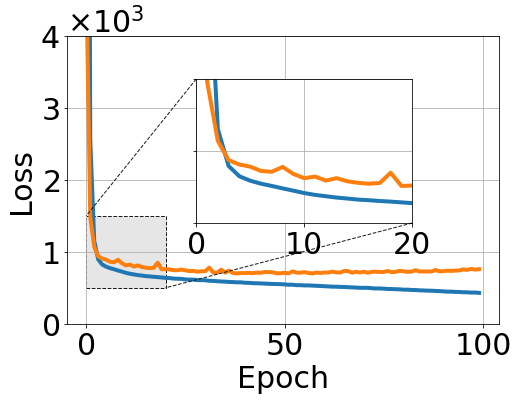

In [149]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.3, 0.35, 0.5, 0.5]) # Smaller figure
axes.plot(metrics30[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(0,4000)

axes2.plot(metrics30[['loss','val_loss']], lw=4)
axes2.set_xlim(0,20)
axes2.set_ylim(500,1500)
# plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
axes.yaxis.set_major_formatter(formatter)

In [ ]:
model30.save("my_dir/8a-30")

In [45]:
model30 = keras.models.load_model("my_dir/8a-30", custom_objects=SeqSelfAttention.get_custom_objects())

In [46]:
scaler_filename = "Best_HP/8a-30"
best_hp30 = joblib.load(scaler_filename)

In [47]:
best_hp30.values

{'units': 75, 'filters': 256, 'kernel_size': 2, 'learning_rate': 0.001}

In [61]:
model30.layers[8].get_weights()[2].shape

(32,)

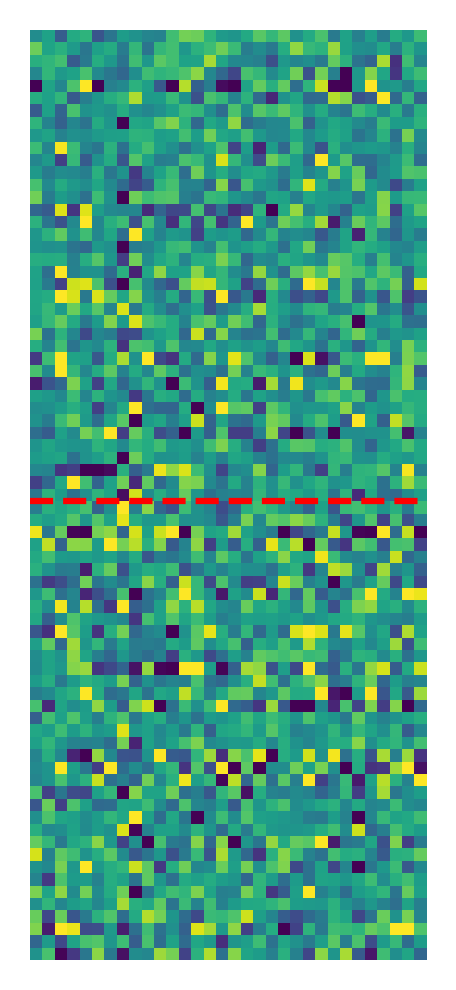

In [84]:
att30_weights = model30.layers[8].get_weights()[0]

plt.figure(figsize=(12,4), dpi=300)

hmap = sns.heatmap(att30_weights,
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            #cbar_kws={'fraction' : 0.01}, # shrink colour bar
            cmap='viridis',
            robust=True,
            square=True,
            )
plt.axhline(y=38, color='red', linestyle='--')


plt.tight_layout()
plt.show()

In [49]:
model30.predict((Wv30,Xv30))

array([[ 59.023396,  59.745155,  67.867744, ...,  65.548004,  40.758633,
         39.20157 ],
       [ 53.896374,  54.72494 ,  61.49757 , ...,  59.944668,  39.26347 ,
         39.009186],
       [ 54.589725,  57.045486,  60.91808 , ...,  58.29884 ,  37.405376,
         37.499847],
       ...,
       [150.7902  , 150.525   , 167.64685 , ..., 166.45932 , 112.65739 ,
        101.25629 ],
       [128.621   , 132.5793  , 143.09807 , ..., 144.51881 , 102.21831 ,
         95.607605],
       [127.51357 , 131.42601 , 141.88034 , ..., 134.42348 ,  91.960495,
         84.919205]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions30 = model30.predict((Wv30,Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30)

MAE30 = mean_absolute_error(yv30,test_predictions30)

RMSE30 = np.sqrt(MSE30)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

eval30 = [MSE30, MAE30, RMSE30, MAPE30]
print(eval30)

In [50]:
test_predictions30 = model30.predict((Wv30,Xv30))


MSE30 = mean_squared_error(yv30,test_predictions30,multioutput='raw_values')

MAE30 = mean_absolute_error(yv30,test_predictions30,multioutput='raw_values')

RMSE30 = mean_squared_error(yv30,test_predictions30,multioutput='raw_values',squared=False)

MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30,multioutput='raw_values')*100

In [51]:
MAE30

array([19.50623188, 21.43336257, 21.23623007, 16.21087089, 21.51518721,
       17.72504631, 14.61677523])

In [52]:
RMSE30

array([25.40774522, 28.37509282, 27.57045043, 21.00402363, 27.90847804,
       23.3013428 , 19.30284506])

In [53]:
MAPE30

array([10.50546576, 10.60548122,  9.95930181,  8.24953049,  9.46666691,
       10.39044762,  9.45098207])

In [ ]:
GEH, count = ga.GEH(np.asarray(yv30), np.asarray(test_predictions30))
GEH30 = count/GEH.size
print(GEH30)

# 60 mins ahead

In [50]:
def build_model_60(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wt60.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=Xt60.shape[1:], name="DeepInput")
    units = hp.Int("units", min_value=1, max_value=100, step=1)
    
    
    # Wide Model
    flatten_60w = keras.layers.TimeDistributed(keras.layers.Flatten())(channel_Wide)
    Bi_60 = keras.layers.Bidirectional(
        keras.layers.LSTM(units=units, return_sequences=True),
        merge_mode="ave"
    )(flatten_60w)
    
    
    # Deep Model
    # CNN 
    CNN_60 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_60 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_60)
    # LSTM          
    LSTM_60 = keras.layers.LSTM(units=units, return_sequences=True)(flatten_60)

    
    # Concatenation 
    concat = keras.layers.concatenate([Bi_60, LSTM_60], axis=1)

    # Attention
    Att_60 = SeqSelfAttention(attention_activation='sigmoid')(concat)
    merge = keras.layers.Flatten()(Att_60)

    
    # Output
    output = keras.layers.Dense(n_features, name= "output")(merge)
    
    # Model
    model_60 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_60.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss="mse", metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_60

In [51]:
tuner60 = RandomSearch(
    build_model_60,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=2,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="8a-60",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\8a-60\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\8a-60\tuner0.json


In [ ]:
tuner60.search_space_summary()

In [ ]:
tuner60.search((Wt60,Xt60), yt60, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

In [ ]:
tuner60.results_summary(1)

### Best model

In [52]:
scaler_filename = "Best_HP/8a-60"
best_hp60 = joblib.load(scaler_filename) 

model60 = tuner60.hypermodel.build(best_hp60)

In [ ]:
best_hp60 = tuner60.get_best_hyperparameters()[0]
model60 = tuner60.hypermodel.build(best_hp60)

In [ ]:
scaler_filename = "Best_HP/8a-60"
joblib.dump(best_hp60, scaler_filename) 

In [ ]:
model60.summary()

In [53]:
model60.fit((Wt60,Xt60), yt60, validation_split = val_percent,
            epochs = 100, 
            verbose = 1
            )

Epoch 1/100
777/777 [==============================] - 18s 17ms/step - loss: 31725.4238 - mean_absolute_error: 142.5234 - root_mean_squared_error: 178.1161 - mean_absolute_percentage_error: 52524380.0000 - val_loss: 13815.0459 - val_mean_absolute_error: 89.7127 - val_root_mean_squared_error: 117.5374 - val_mean_absolute_percentage_error: 4014948.7500
Epoch 2/100
777/777 [==============================] - 11s 14ms/step - loss: 7603.7993 - mean_absolute_error: 61.3092 - root_mean_squared_error: 87.1998 - mean_absolute_percentage_error: 49133468.0000 - val_loss: 3789.6682 - val_mean_absolute_error: 42.6661 - val_root_mean_squared_error: 61.5603 - val_mean_absolute_percentage_error: 3622925.5000
Epoch 3/100
777/777 [==============================] - 11s 14ms/step - loss: 2547.7869 - mean_absolute_error: 34.3151 - root_mean_squared_error: 50.4756 - mean_absolute_percentage_error: 45232008.0000 - val_loss: 1819.7402 - val_mean_absolute_error: 29.9900 - val_root_mean_squared_error: 42.6584 - 

Epoch 25/100
777/777 [==============================] - 11s 14ms/step - loss: 696.3712 - mean_absolute_error: 19.2853 - root_mean_squared_error: 26.3889 - mean_absolute_percentage_error: 42540276.0000 - val_loss: 911.6769 - val_mean_absolute_error: 21.2641 - val_root_mean_squared_error: 30.1940 - val_mean_absolute_percentage_error: 4227975.0000
Epoch 26/100
777/777 [==============================] - 11s 15ms/step - loss: 691.4035 - mean_absolute_error: 19.2225 - root_mean_squared_error: 26.2945 - mean_absolute_percentage_error: 42448232.0000 - val_loss: 913.6364 - val_mean_absolute_error: 21.4821 - val_root_mean_squared_error: 30.2264 - val_mean_absolute_percentage_error: 4471427.0000
Epoch 27/100
777/777 [==============================] - 12s 15ms/step - loss: 686.3575 - mean_absolute_error: 19.1446 - root_mean_squared_error: 26.1984 - mean_absolute_percentage_error: 41841732.0000 - val_loss: 913.7371 - val_mean_absolute_error: 21.4268 - val_root_mean_squared_error: 30.2281 - val_mean

Epoch 49/100
777/777 [==============================] - 11s 14ms/step - loss: 632.7033 - mean_absolute_error: 18.4481 - root_mean_squared_error: 25.1536 - mean_absolute_percentage_error: 32349750.0000 - val_loss: 893.2891 - val_mean_absolute_error: 21.3035 - val_root_mean_squared_error: 29.8879 - val_mean_absolute_percentage_error: 4241548.5000
Epoch 50/100
777/777 [==============================] - 11s 14ms/step - loss: 631.5676 - mean_absolute_error: 18.4379 - root_mean_squared_error: 25.1310 - mean_absolute_percentage_error: 31498720.0000 - val_loss: 865.9794 - val_mean_absolute_error: 20.9439 - val_root_mean_squared_error: 29.4275 - val_mean_absolute_percentage_error: 4081266.2500
Epoch 51/100
777/777 [==============================] - 11s 14ms/step - loss: 630.0419 - mean_absolute_error: 18.4226 - root_mean_squared_error: 25.1006 - mean_absolute_percentage_error: 31335868.0000 - val_loss: 865.0246 - val_mean_absolute_error: 21.0283 - val_root_mean_squared_error: 29.4113 - val_mean

Epoch 73/100
777/777 [==============================] - 11s 14ms/step - loss: 591.7041 - mean_absolute_error: 17.9160 - root_mean_squared_error: 24.3250 - mean_absolute_percentage_error: 26058566.0000 - val_loss: 845.4030 - val_mean_absolute_error: 20.7294 - val_root_mean_squared_error: 29.0758 - val_mean_absolute_percentage_error: 3992017.7500
Epoch 74/100
777/777 [==============================] - 11s 14ms/step - loss: 589.7394 - mean_absolute_error: 17.8928 - root_mean_squared_error: 24.2845 - mean_absolute_percentage_error: 25871282.0000 - val_loss: 861.4728 - val_mean_absolute_error: 20.9870 - val_root_mean_squared_error: 29.3509 - val_mean_absolute_percentage_error: 3977153.5000
Epoch 75/100
777/777 [==============================] - 11s 14ms/step - loss: 588.9634 - mean_absolute_error: 17.8645 - root_mean_squared_error: 24.2686 - mean_absolute_percentage_error: 25491904.0000 - val_loss: 837.2209 - val_mean_absolute_error: 20.7254 - val_root_mean_squared_error: 28.9348 - val_mean

Epoch 97/100
777/777 [==============================] - 11s 14ms/step - loss: 558.4073 - mean_absolute_error: 17.4372 - root_mean_squared_error: 23.6306 - mean_absolute_percentage_error: 22118690.0000 - val_loss: 835.8859 - val_mean_absolute_error: 20.7707 - val_root_mean_squared_error: 28.9117 - val_mean_absolute_percentage_error: 4091251.0000
Epoch 98/100
777/777 [==============================] - 11s 14ms/step - loss: 561.1206 - mean_absolute_error: 17.4938 - root_mean_squared_error: 23.6880 - mean_absolute_percentage_error: 22215060.0000 - val_loss: 854.0787 - val_mean_absolute_error: 21.0338 - val_root_mean_squared_error: 29.2246 - val_mean_absolute_percentage_error: 4171925.0000
Epoch 99/100
777/777 [==============================] - 11s 14ms/step - loss: 556.8698 - mean_absolute_error: 17.4177 - root_mean_squared_error: 23.5981 - mean_absolute_percentage_error: 22221140.0000 - val_loss: 846.7563 - val_mean_absolute_error: 20.9126 - val_root_mean_squared_error: 29.0991 - val_mean

In [54]:
metrics60 = pd.DataFrame(model60.history.history)

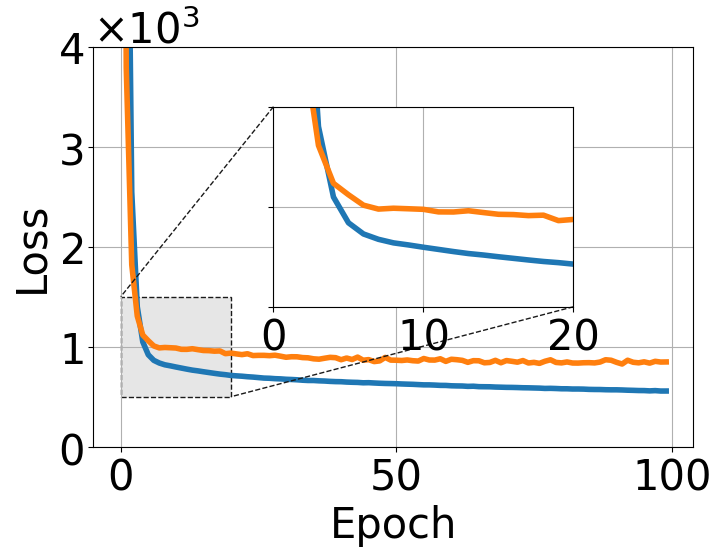

In [55]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.3, 0.35, 0.5, 0.5]) # Smaller figure
axes.plot(metrics60[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(0,4000)

axes2.plot(metrics60[['loss','val_loss']], lw=4)
axes2.set_xlim(0,20)
axes2.set_ylim(500,1500)
# plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
axes.yaxis.set_major_formatter(formatter)

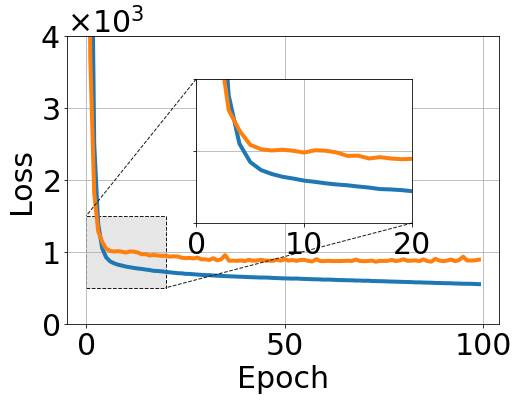

In [151]:
fig = plt.figure(figsize=(6,4))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) 
axes2 = fig.add_axes([0.3, 0.35, 0.5, 0.5]) # Smaller figure
axes.plot(metrics60[['loss','val_loss']], label=['train_loss','val_loss'], lw=4)
axes.set_ylim(0,4000)

axes2.plot(metrics60[['loss','val_loss']], lw=4)
axes2.set_xlim(0,20)
axes2.set_ylim(500,1500)
# plt.xticks(visible=False)
plt.yticks(visible=False)

axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')
axes.grid()
axes2.grid()

mark_inset(axes, axes2, loc1=2, loc2=4, fc="0.9", ec="0.1", ls='--')
axes.yaxis.set_major_formatter(formatter)

In [ ]:
model60.save("my_dir/8a-60")

In [50]:
model60 = keras.models.load_model("my_dir/8a-60", custom_objects=SeqSelfAttention.get_custom_objects())

In [51]:
scaler_filename = "Best_HP/8a-60"
best_hp60 = joblib.load(scaler_filename)

In [52]:
best_hp60.values

{'units': 43, 'filters': 96, 'kernel_size': 2, 'learning_rate': 0.001}

In [53]:
model60.layers[8].get_weights()[0].shape

(43, 32)

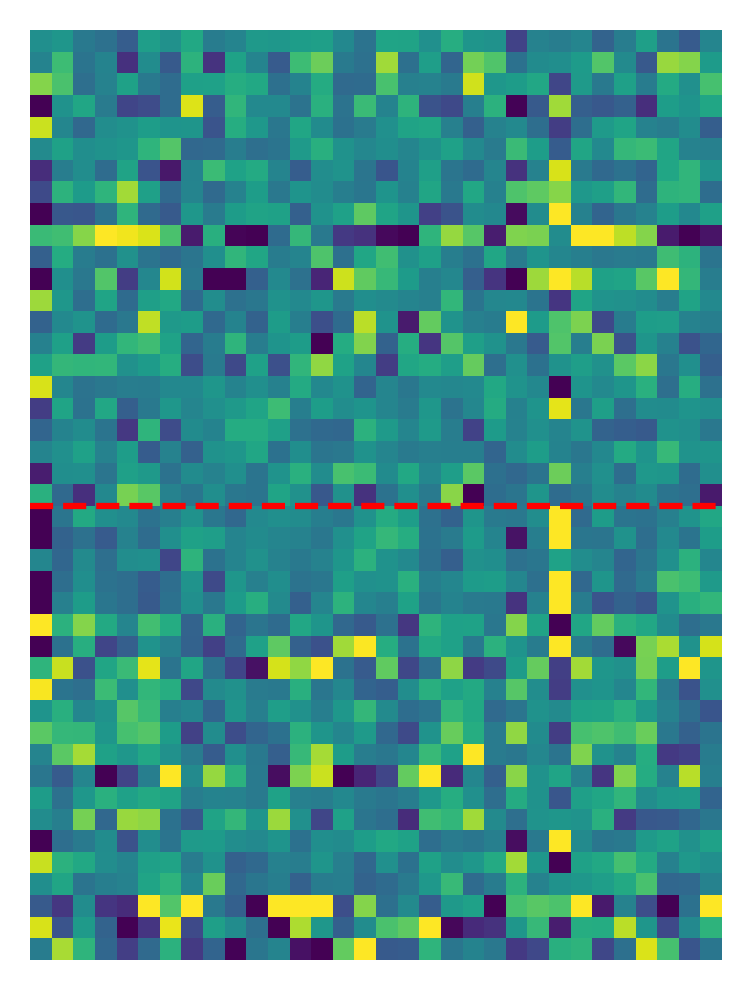

In [102]:
att60_weights = model60.layers[8].get_weights()[0]

plt.figure(figsize=(12,4), dpi=300)

hmap = sns.heatmap(att60_weights,
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            #cbar_kws={'fraction' : 0.01}, # shrink colour bar
            cmap='viridis',
            robust=True,
            square=True,
            )
plt.axhline(y=22, color='red', linestyle='--')

plt.tight_layout()
plt.show()

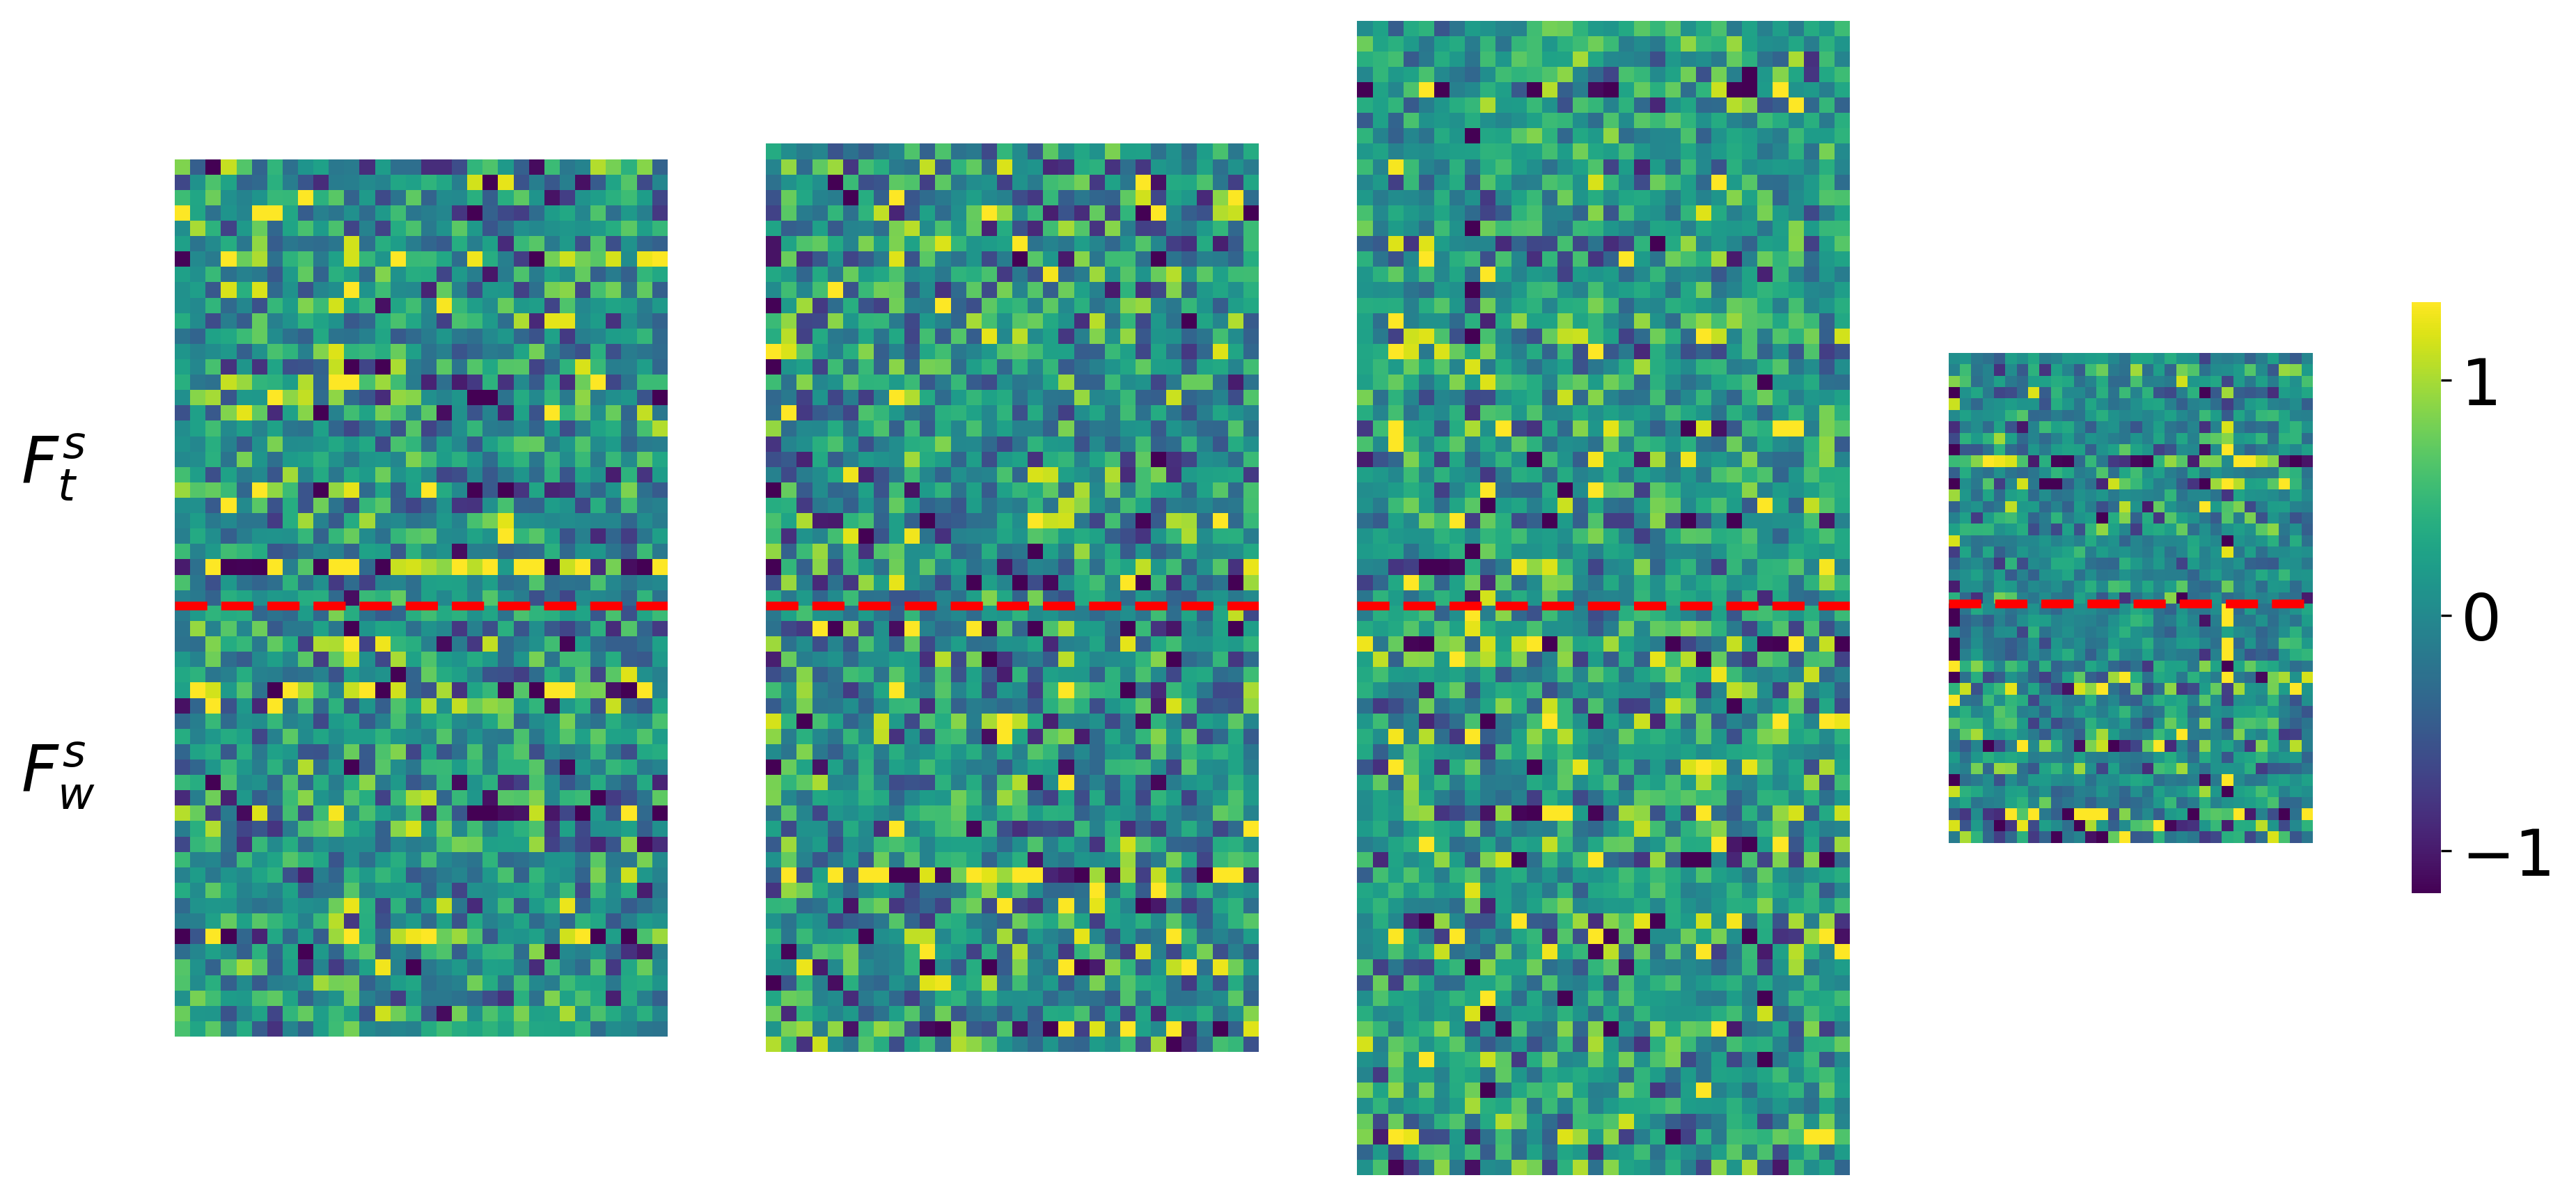

In [131]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(14, 8), dpi=300)

# Figure 1
att5_weights = model5.layers[8].get_weights()[0]
sns.heatmap(att5_weights,
            ax=axs[0],
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            cmap='viridis',
            robust=True,
            square=True)
#axs[0].set_title('5 mins')
axs[0].axhline(y=29, color='red', linestyle='--', lw=3)

# Add axis labels to the top and bottom halves
axs[0].text(-10, 20, "$F_{t}^{s}$", fontsize=22, va='center')  # top half
axs[0].text(-10, 40, "$F_{w}^{s}$", fontsize=22, va='center')  # bottom half

# Figure 2
att15_weights = model15.layers[8].get_weights()[0]
sns.heatmap(att15_weights,
            ax=axs[1],
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            cmap='viridis',
            robust=True,
            square=True)
#axs[1].set_title('15 mins')
axs[1].axhline(y=30, color='red', linestyle='--', lw=3)

# Figure 3
att30_weights = model30.layers[8].get_weights()[0]
sns.heatmap(att30_weights,
            ax=axs[2],
            xticklabels=False,
            yticklabels=False,
            cbar=False,
            cmap='viridis',
            robust=True,
            square=True)
#axs[2].set_title('30 mins')
axs[2].axhline(y=38, color='red', linestyle='--', lw=3)

# Figure 4
att60_weights = model60.layers[8].get_weights()[0]
sns.heatmap(att60_weights,
            ax=axs[3],
            xticklabels=False,
            yticklabels=False,
            cbar=True,
            cbar_kws={'fraction' : 0.06, 'pad': 0.2},
            cmap='viridis',
            robust=True,
            square=True)
#axs[3].set_title('60 mins')
axs[3].axhline(y=22, color='red', linestyle='--', lw=3)

# Adjust spacing between subplots
# plt.tight_layout()

# Display the figure
plt.show()


In [55]:
model60.predict((Wv60,Xv60))

array([[ 52.280888,  54.740578,  60.751358, ...,  61.27484 ,  42.039   ,
         41.67343 ],
       [ 49.84779 ,  52.421577,  56.765812, ...,  55.56859 ,  39.15346 ,
         39.44658 ],
       [ 47.525677,  50.158974,  53.37129 , ...,  52.303463,  37.4556  ,
         40.917038],
       ...,
       [134.21025 , 138.58275 , 148.93796 , ..., 144.45364 ,  95.04853 ,
         86.20823 ],
       [130.81146 , 137.22533 , 144.57617 , ..., 140.95178 ,  93.62418 ,
         84.92316 ],
       [122.341515, 125.46215 , 135.98526 , ..., 132.48659 ,  88.46222 ,
         81.21714 ]], dtype=float32)

### Evaluation on inverse_transform

In [ ]:
test_predictions60 = model60.predict((Wv60,Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60)

MAE60 = mean_absolute_error(yv60,test_predictions60)

RMSE60 = np.sqrt(MSE60)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

eval60 = [MSE60, MAE60, RMSE60, MAPE60]
print(eval60)

In [56]:
test_predictions60 = model60.predict((Wv60,Xv60))


MSE60 = mean_squared_error(yv60,test_predictions60,multioutput='raw_values')

MAE60 = mean_absolute_error(yv60,test_predictions60,multioutput='raw_values')

RMSE60 = mean_squared_error(yv60,test_predictions60,multioutput='raw_values',squared=False)

MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60,multioutput='raw_values')*100

In [57]:
MAE60

array([19.29579618, 21.32130853, 20.85102069, 15.68516783, 20.98491467,
       17.04892197, 14.0532244 ])

In [58]:
RMSE60

array([25.0532354 , 28.07286625, 27.1803886 , 20.26796703, 27.16459435,
       22.50531174, 18.50613346])

In [59]:
MAPE60

array([10.12349256, 10.31965719,  9.57008769,  7.81606216,  9.04147249,
        9.89044889,  9.08399682])

In [ ]:
GEH, count = ga.GEH(np.asarray(yv60), np.asarray(test_predictions60))
GEH60 = count/GEH.size
print(GEH60)

# RESULTS

## General results

In [ ]:
l = ['MSE','MAE','RMSE','MAPE','Horizon']

In [ ]:
eval5.append(5)
eval15.append(15)
eval30.append(30)
eval60.append(60)

In [ ]:
df = pd.DataFrame(np.array([eval5,eval15,eval30,eval60]),columns=l)
df.set_index('Horizon')

## GEH

In [ ]:
n = [' 5 ',' 15 ',' 30 ',' 60 ']
df2 = pd.DataFrame(np.array([[GEH5, GEH15, GEH30, GEH60]]), columns=n)
print(df2)

## Save Loss

In [ ]:
metrics5.to_csv('Loss/8a-5.csv') 
metrics15.to_csv('Loss/8a-15.csv') 
metrics30.to_csv('Loss/8a-30.csv') 
metrics60.to_csv('Loss/8a-60.csv') 